# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.

- Controls for Hispanic Origin by age and sex.

- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
## Importing librabries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
## Reading the dataset
df=pd.read_csv("census_income.csv")
pd.set_option("display.max_columns",None)
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns (including target) in my dataset.

In [5]:
## Checking data type
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

### Outputs:-
- There are 9 columns are object data type. Our Target:-Income variable is also Object data type. We have to convert it into numeric form.
- There are 6 columns are Numeric data type.

### Let's separate both data type columns.

In [6]:
## Categorical columns
cat_features=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_features.append(i)

## Numerical Columns
num_features=[]
for j in df.columns:
    if df[j].dtype=='int64':
        num_features.append(j)
print(cat_features)
print(num_features)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


### Checking Nullls

In [7]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

That's Nice!!! There is no nulls present in my dataset.

### Checking unique values in Both types of features.

In [8]:
for i in cat_features:
    print(i , " :- ", df[i].nunique())

Workclass  :-  9
Education  :-  16
Marital_status  :-  7
Occupation  :-  15
Relationship  :-  6
Race  :-  5
Sex  :-  2
Native_country  :-  42
Income  :-  2


In [9]:
for i in num_features:
    print(i , " :- ", df[i].nunique())

Age  :-  73
Fnlwgt  :-  21647
Education_num  :-  16
Capital_gain  :-  119
Capital_loss  :-  92
Hours_per_week  :-  94


In [10]:
for i in cat_features:
    print("*******",i,"********\n")
    print(df[i].value_counts(normalize=True))
    print("\n\n")

******* Workclass ********

 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: Workclass, dtype: float64



******* Education ********

 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: Education, dtype: float64



******* Marital_status ********

 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed       

### Outputs:-
- Our Target variable i.e. `Income` has two categories, whether the income is '<=50' or '>50'.
- Seems our  target variable is imbalanced. It's ratio of categories is 76%/24%.
- `Workclass`,`Occupation` and `Native_country` features have some unwanted categories as '?'. We will replace it with np.nan.
- We will not check '?' for numeric columns because except object data type features ,other data types columns can not hold any symbols.

### Replacing '?' with np.nan
Let's load dataset again , but this time we will convert "?" with np.nan.

In [11]:
df=pd.read_csv("census_income.csv",na_values="?",skipinitialspace=True)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
for i in cat_features:
    print("*******",i,"********\n")
    print(df[i].isna().sum())
    print("\n\n")

******* Workclass ********

1836



******* Education ********

0



******* Marital_status ********

0



******* Occupation ********

1843



******* Relationship ********

0



******* Race ********

0



******* Sex ********

0



******* Native_country ********

583



******* Income ********

0





In [13]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

there is good number of Nan's present in my dataset now. We will see them in EDA part that whether we will keep them or drop them.

### Summary of Stats:

In [14]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- There are only few int type columns present in df.describe.
- Seems these features have no null values present.
- `Capital_gain` and `Capital_loss` features have '0' min/25%/50%/75%. We will check it later.
- The maximum age is 90 but it can not be accepted. May it is a wrong entry or outlier. we will also check it.

### Checking correlated:


In [15]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


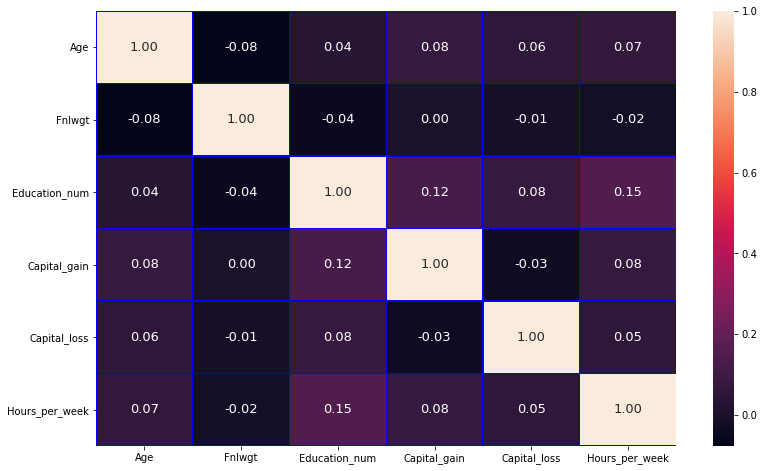

In [16]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':13},linewidths=0.2,linecolor='b',fmt='.2f')
plt.show()

- Numeric feature are not related with each other. It is good for  us.
- Fnlwgt feature are not useful for predicting income as the inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups. This feature is not usefull hence before model building we will drop it.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Drop Duplicates

In [18]:
print("Previous shape of the data frame: ",df.shape)

Previous shape of the data frame:  (32560, 15)


In [19]:
df=df.drop_duplicates()
print("New shape of the data frame: ",df.shape)

New shape of the data frame:  (32536, 15)


## EDA & Data Preprocessing:

Let's first Handle with missing values.

#### Workclass

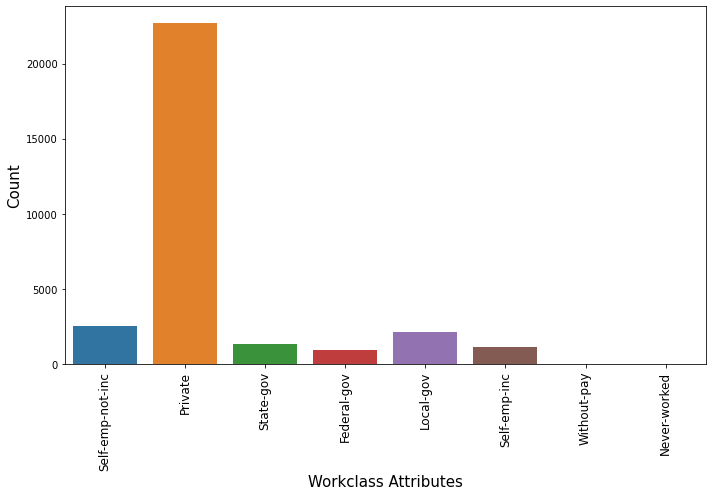

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(df['Workclass'])
plt.xlabel('Workclass Attributes',fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Count",fontsize=15)
plt.tight_layout()


### Output:-
- Most of the people are doing private job So that it's safe to replace missing value with Private Jobs.

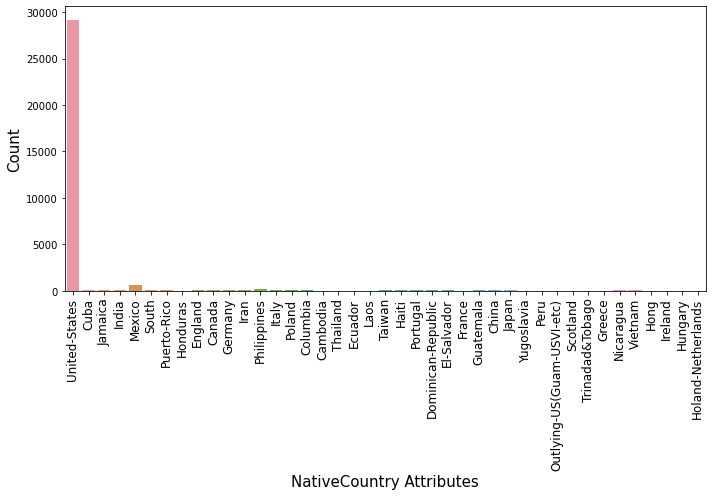

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(df['Native_country'])
plt.xlabel('NativeCountry Attributes',fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Count",fontsize=15)
plt.tight_layout()


- Most of the people region is United-States hence we will replace all the nulls with United-states.

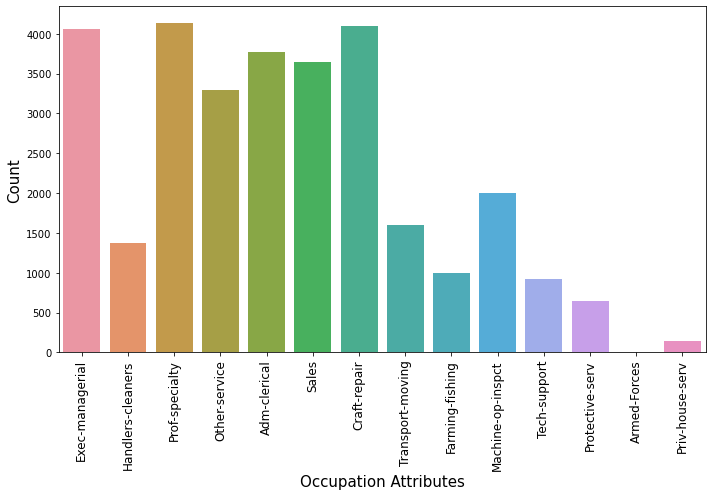

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(df['Occupation'])
plt.xlabel('Occupation Attributes',fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Count",fontsize=15)
plt.tight_layout()


### outputs:-
- The count plot for occupation showing balanced data points.
- We can not replace Nulls with any attributes.
- So it's safe to drop these rows.

### Dropping missing values in Occupation:

In [23]:
df.dropna(subset=['Occupation'],inplace=True)

In [24]:
df.isnull().sum()

Age                 0
Workclass           0
Fnlwgt              0
Education           0
Education_num       0
Marital_status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_gain        0
Capital_loss        0
Hours_per_week      0
Native_country    555
Income              0
dtype: int64

- We can see that As we drop the missing values of `Occupation` feature, `Workclass` features nulls are also gone.

Let's replace native__country feature's null with 'United-States'.

In [25]:
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


<AxesSubplot:>

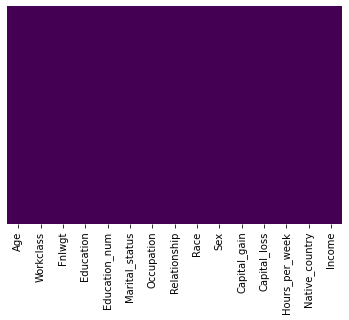

In [26]:
print(df.isnull().sum())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have successfully handle null values.

## Let's Visualize the Categorical Features :

<=50K    23045
>50K      7648
Name: Income, dtype: int64


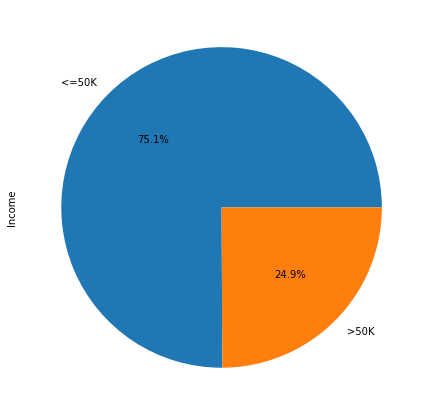

In [27]:
print(df.Income.value_counts())
plt.figure(figsize=(6,6))
df.Income.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.tight_layout()

We can see there is imbalanced class.

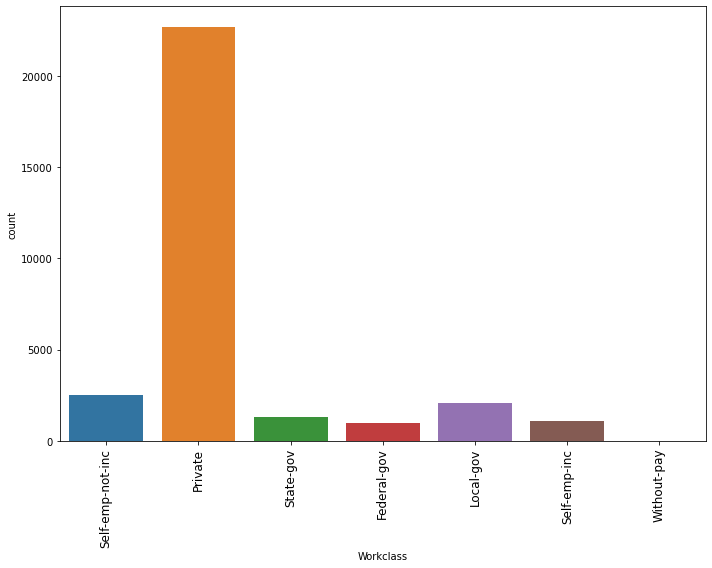

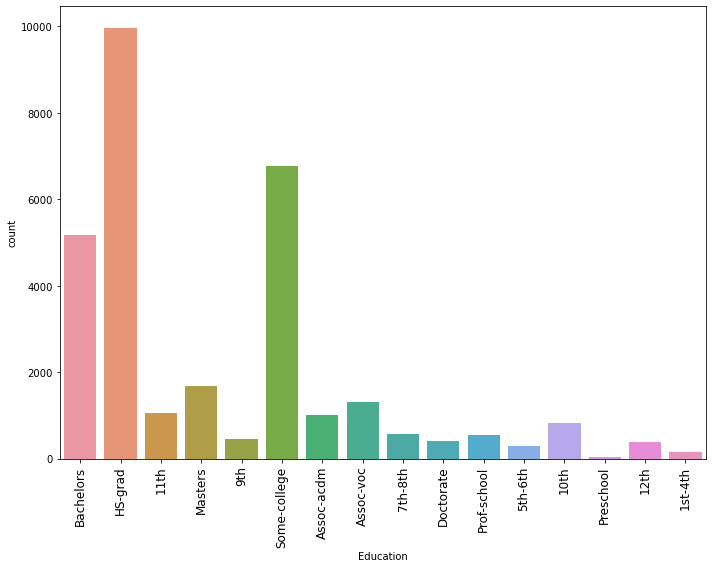

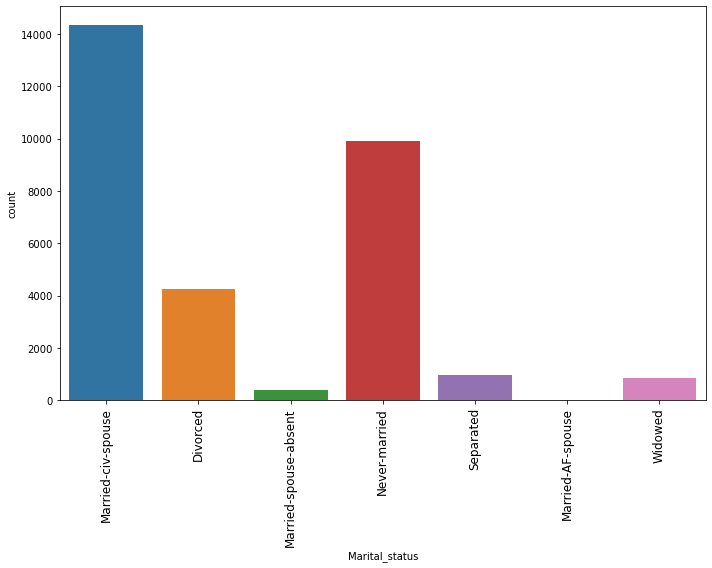

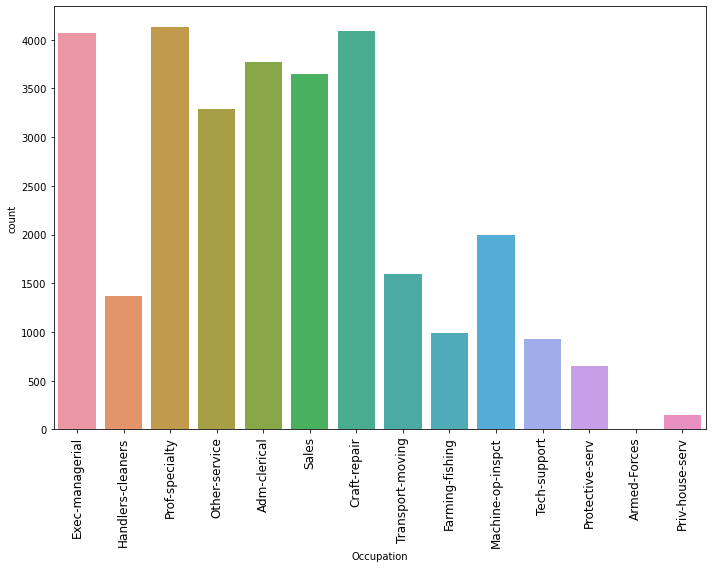

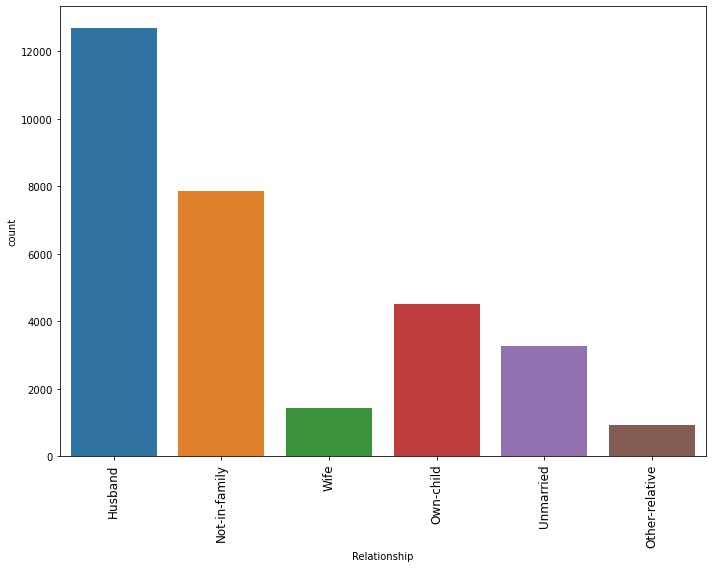

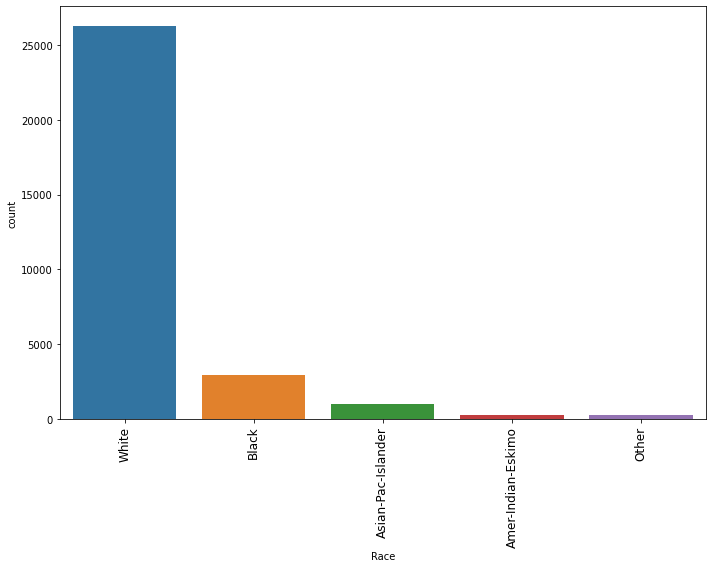

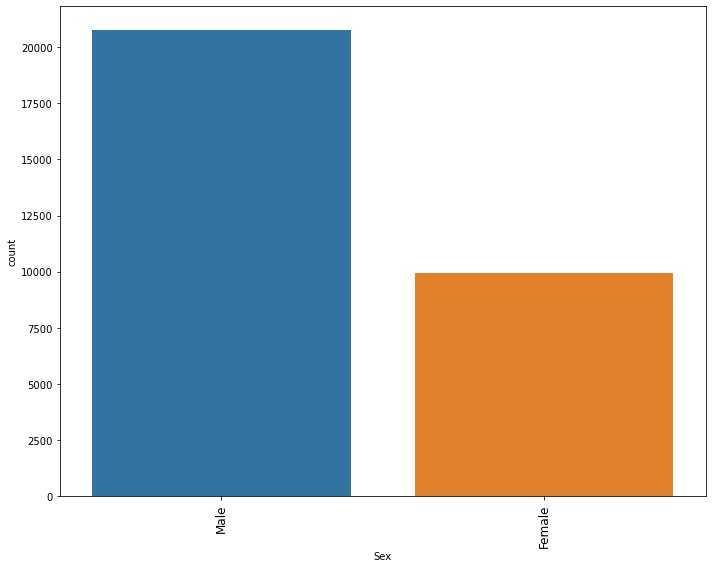

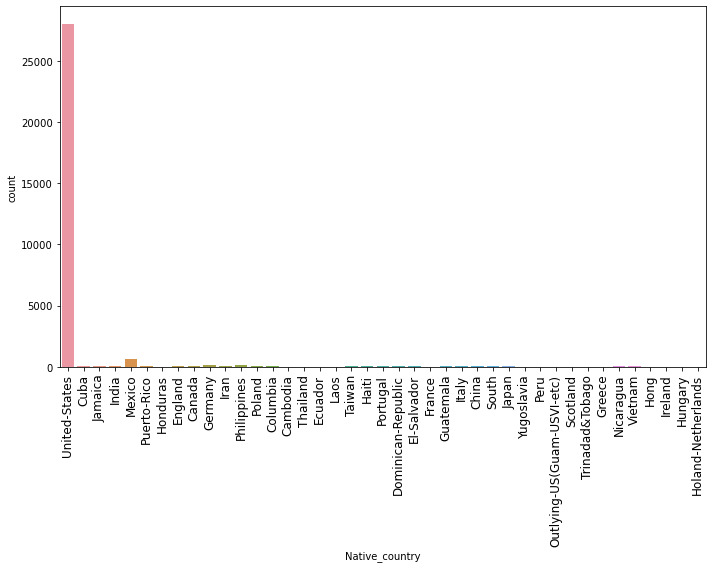

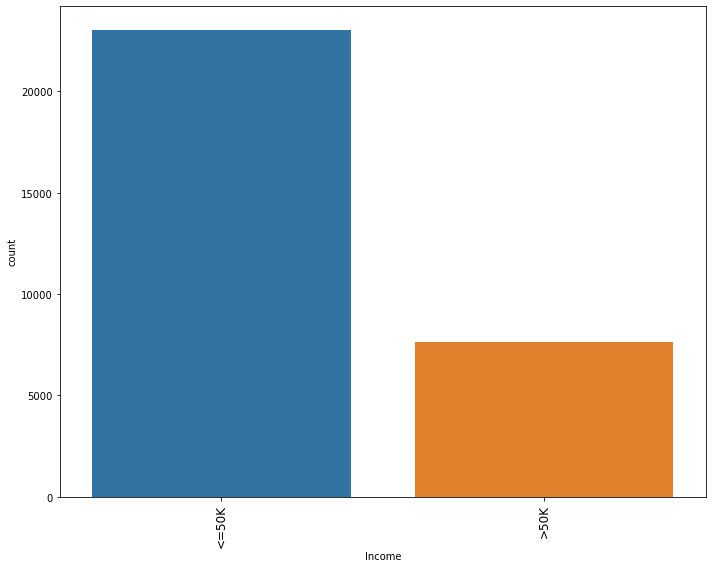

In [28]:
for i in cat_features:
    plt.figure(figsize=(10,8))
    sns.countplot(df[i])
    plt.xticks(rotation=90,fontsize=12)
    plt.tight_layout()

## outpus:-
- `Workclass` :- We can see that in education graph the count of private jobs people is highest.
- `Education`:- The Hs-grid(High School) have higest count of people.
- `Marital_status`:- Married with armed forced spouse and married with civilion are highest participant in census income prediction.
- `Occupation`:- occupation have quite fine distributed data points.
- `Relationship`:- Husband attribute are highest count to participate in census income.
- `Race`:- White people have most count.

## Categorical Features VS Target

In [29]:
print(cat_features)
def plot_cat(feature,target):    
    plt.rcParams["figure.figsize"]=(10,6)
    pd.crosstab(columns=df[target],index=df[feature],normalize='index').plot.bar(grid=True)
    plt.xticks(rotation=90,fontsize=12)
    cross_tab=pd.crosstab(columns=df[target],index=df[feature],normalize='index')
    return cross_tab


['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Income,<=50K,>50K
Workclass,,
Federal-gov,0.613542,0.386458
Local-gov,0.705208,0.294792
Private,0.781193,0.218807
Self-emp-inc,0.442652,0.557348
Self-emp-not-inc,0.714961,0.285039
State-gov,0.727833,0.272167
Without-pay,1.000000,0.000000


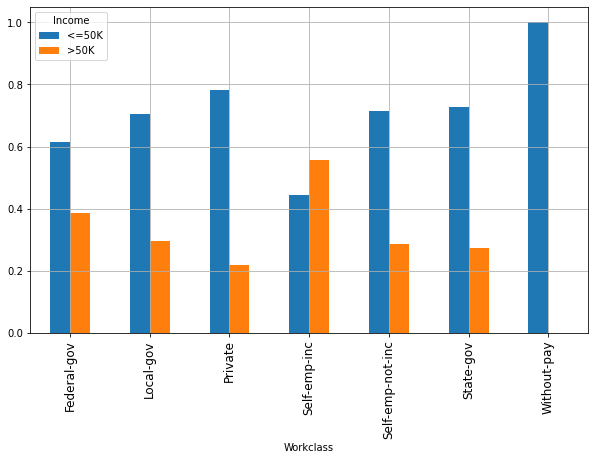

In [30]:
plot_cat('Workclass','Income')

- Self employee income is highest chance of earning more then 50k.
- we can see that people who are without pay have 100% less then 50k and it is obvious that if people income is zero then it will always saying without pay.

Income,<=50K,>50K
Education,,
10th,0.927798,0.072202
11th,0.943182,0.056818
12th,0.921120,0.078880
1st-4th,0.961039,0.038961
5th-6th,0.953642,0.046358
7th-8th,0.933566,0.066434
9th,0.943844,0.056156
Assoc-acdm,0.746078,0.253922
Assoc-voc,0.736563,0.263437


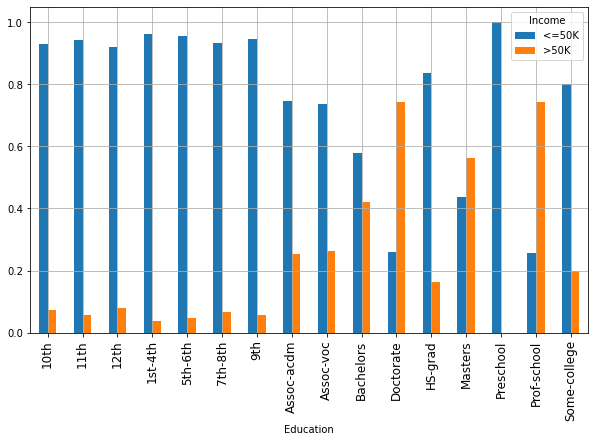

In [31]:
plot_cat('Education','Income')

- People who have Doctorate or Prof-school degree have more chance to get income more then 50k.
- All school standards have less income(<=50k). It is obvious that it any one in school it mean they are fresher in this field or having less experience or having less knowledge.

Income,<=50K,>50K
Marital_status,,
Divorced,0.892622,0.107378
Married-AF-spouse,0.523810,0.476190
Married-civ-spouse,0.545175,0.454825
Married-spouse-absent,0.915167,0.084833
Never-married,0.951289,0.048711
Separated,0.931178,0.068822
Widowed,0.903571,0.096429


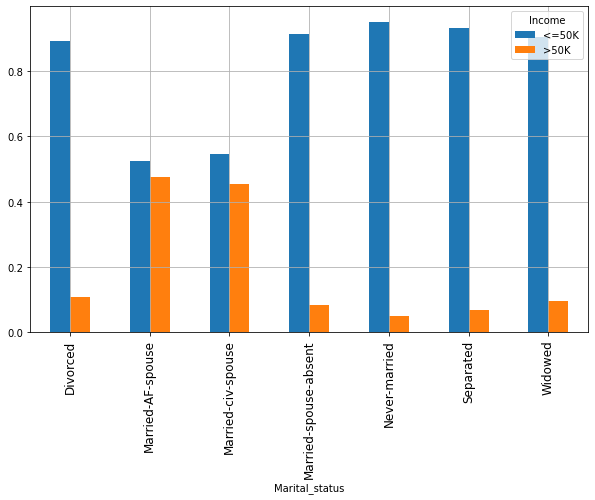

In [32]:
plot_cat('Marital_status','Income')

`Marital_status` attributes details:-
- Divorced:- man and woman are legaly dissolute the marriage. It mean they are single now.
- Married-AF-spouse:- it means married with armed forced man or woman.
- Married-civ-spouse:- It means married with civilion man or women.
- Married-spouse-absent:- married spouse refers to a married a couple living apart for  reasons other than marital discord, such as military service,work in another location etc.
- Never-Married:- it means they are still single.
- separated:- Separation means that you are living apart from your spouse but are still legally married until you get a judgment of divorce.
- Widowed:- having lost one's spouse by death and not married again.

Outputs:-
- those people spouse is working in Armed fored and is a civilion then its highest chance that their income will be more then 50k.
- If person's spouse are abset or divorced or single then their income will be less then 50k

Income,<=50K,>50K
Occupation,,
Adm-clerical,0.865410,0.134590
Armed-Forces,0.888889,0.111111
Craft-repair,0.773083,0.226917
Exec-managerial,0.515867,0.484133
Farming-fishing,0.884073,0.115927
Handlers-cleaners,0.937180,0.062820
Machine-op-inspct,0.875500,0.124500
Other-service,0.958371,0.041629
Priv-house-serv,0.993197,0.006803


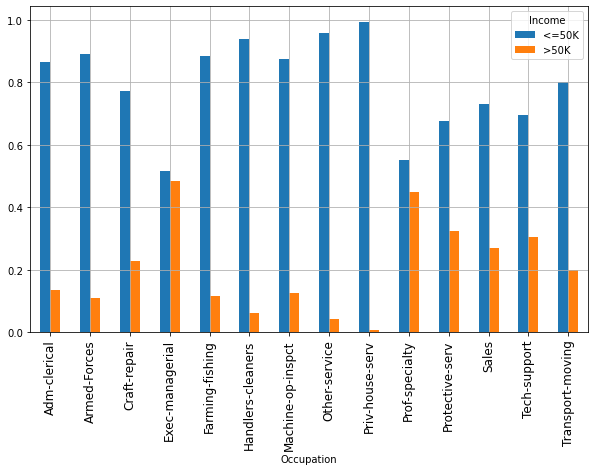

In [33]:
plot_cat('Occupation','Income')

- Those people if there occupation is Exec-managerial or prof-specialty have highest chance to earing more then 50k. It is because Professionals is the highest level of management in a organization responsible for planning, leading and controlling  a business.
- Private House Service have less chance to earn more then 50k and highest chance to earn less then 50k. It is obvious that housekeeping service is the one of then cheapest earning profession.

Income,<=50K,>50K
Relationship,,
Husband,0.544259,0.455741
Not-in-family,0.893262,0.106738
Other-relative,0.960784,0.039216
Own-child,0.985401,0.014599
Unmarried,0.933945,0.066055
Wife,0.508711,0.491289


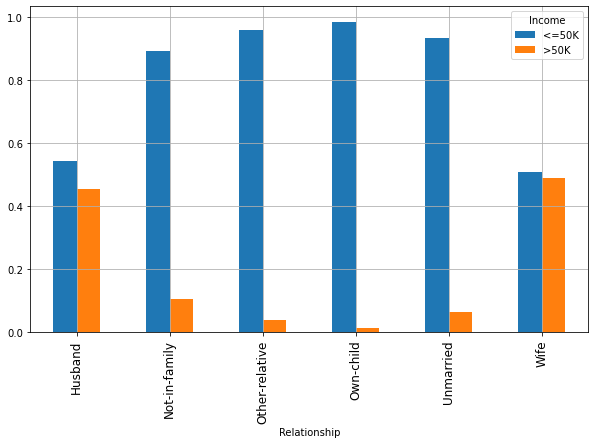

In [34]:
plot_cat('Relationship','Income')

- Husband or Wife have highest chance of earning more then 50k.

Income,<=50K,>50K
Sex,,
Female,0.886403,0.113597
Male,0.686068,0.313932


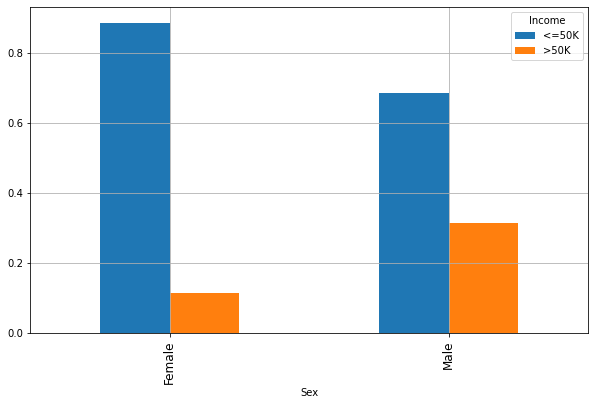

In [35]:
plot_cat('Sex','Income')

- Male people have more chance to earn more then 50k.
- we plot a cross tab table showing the percentage of income classes across the  genders in also figure above. From the graph overall there exists a wage gap females and males. 
- Since we do not have exactly value of income, We are limited to only observing that the count of the males earning more than 50k is a more than 2x multiple of their female counterparts.

Income,<=50K,>50K
Race,,
Amer-Indian-Eskimo,0.881119,0.118881
Asian-Pac-Islander,0.721480,0.278520
Black,0.869969,0.130031
Other,0.907258,0.092742
White,0.735835,0.264165


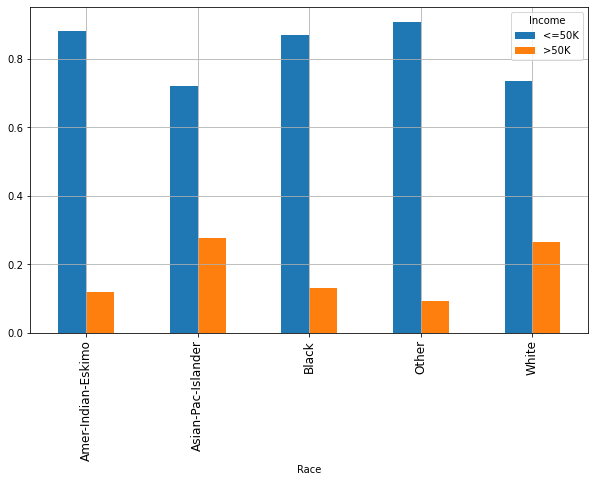

In [36]:
plot_cat('Race','Income')

- White and Asian_pac_islander have more chance to earn more then 50k

Income,<=50K,>50K
Native_country,,
Cambodia,0.611111,0.388889
Canada,0.663551,0.336449
China,0.705882,0.294118
Columbia,0.964286,0.035714
Cuba,0.728261,0.271739
Dominican-Republic,0.970149,0.029851
Ecuador,0.851852,0.148148
El-Salvador,0.910000,0.090000
England,0.651163,0.348837


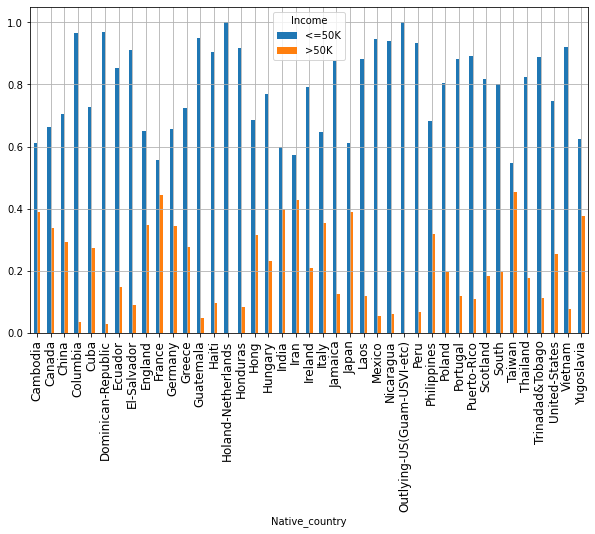

In [37]:
plot_cat('Native_country','Income')

<Figure size 720x432 with 0 Axes>

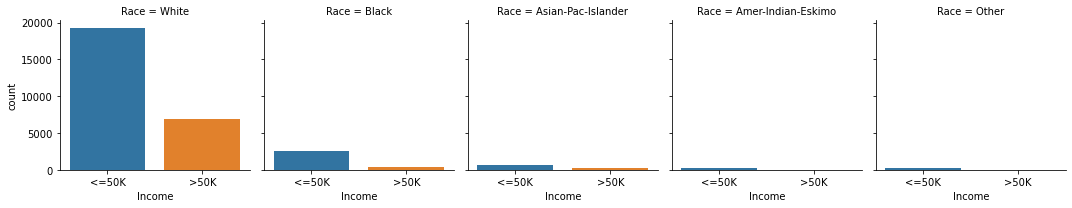

In [38]:
### Factor plot Race vs Income
plt.figure(figsize=(10,6))
sns.factorplot(x='Income',col='Race',kind='count',data=df,size=3)
plt.tight_layout()

White attribute have highest count of people. We can replace rest of the attributes with others.

In [39]:
for i in df.Race:
    if i != 'White':
        df.replace(i,"Others",inplace=True)
        

In [40]:
df.Race.value_counts()

White     26279
Others     4414
Name: Race, dtype: int64

<Figure size 720x432 with 0 Axes>

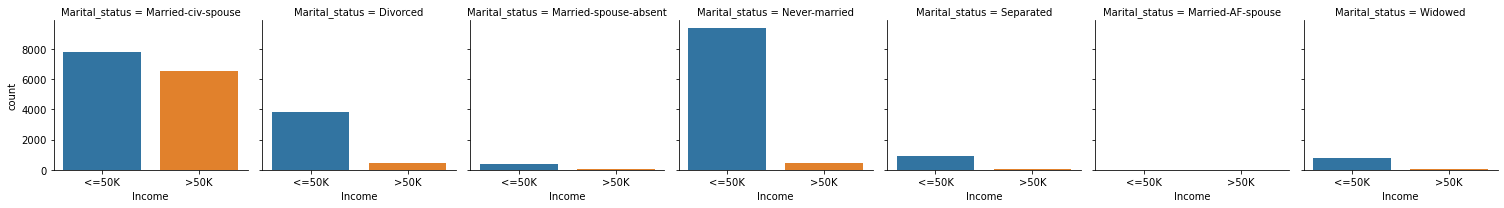

In [41]:
### Factor plot Marital_status vs Income
plt.figure(figsize=(10,6))
sns.factorplot(x='Income',col='Marital_status',kind='count',data=df,size=3)
plt.tight_layout()

 We can see that those people married with a civilion person  their more chances to earn more than 50k.

## Numeric Data type Features:

In [42]:

num_features

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [43]:
def num_plot(feature):
    plt.figure(figsize=(10,7))
    sns.distplot(x=df[feature],color='green',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
    plt.xlabel(feature,fontsize=15)
    plt.ylabel('Density',fontsize=15)
    plt.title('Distribution of the Data',fontsize=18)
    plt.tight_layout()

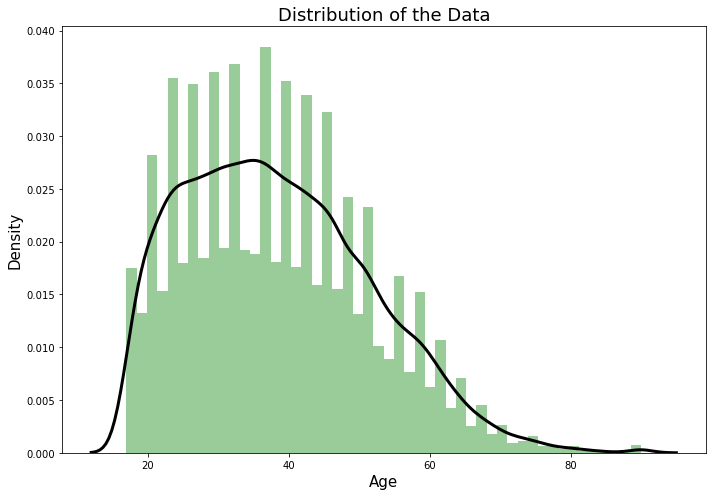

In [44]:
num_plot('Age')

- The distribution of the data points in Age is right distributed.
- People 25 to 45 aged are highest participants.

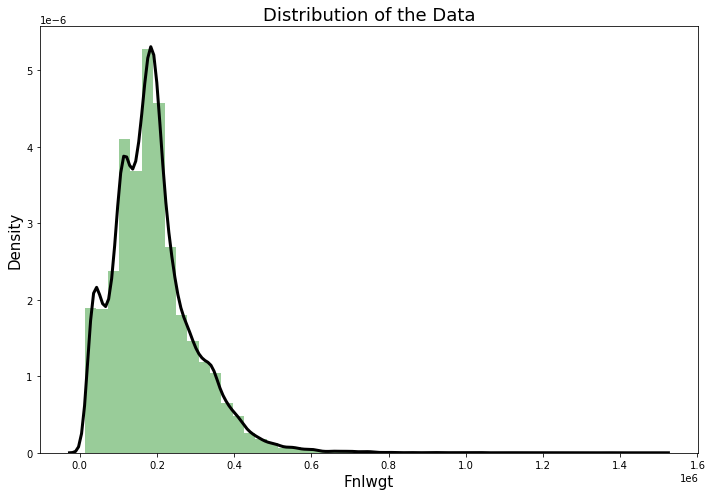

In [45]:
num_plot('Fnlwgt')

- Fnlwgt is highly right skewed. 
- Maximum data points in Fnlwgt fall in 0 0.3 range.

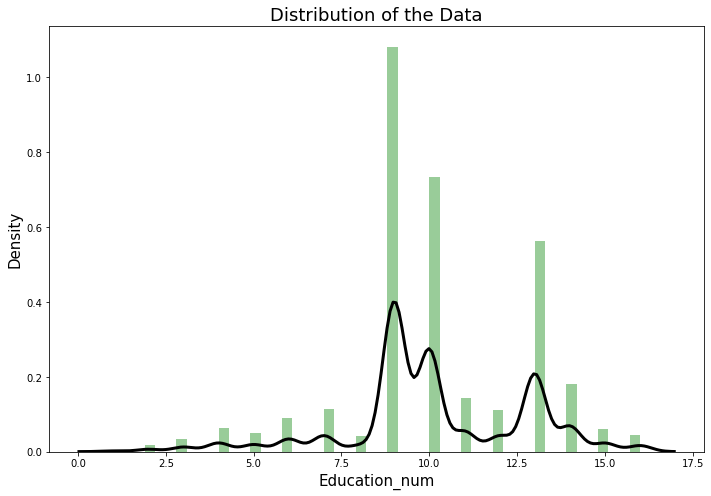

In [46]:
num_plot('Education_num')

- Education number may be replaced with standard number.
- Education number highly right skewed and little left as well.

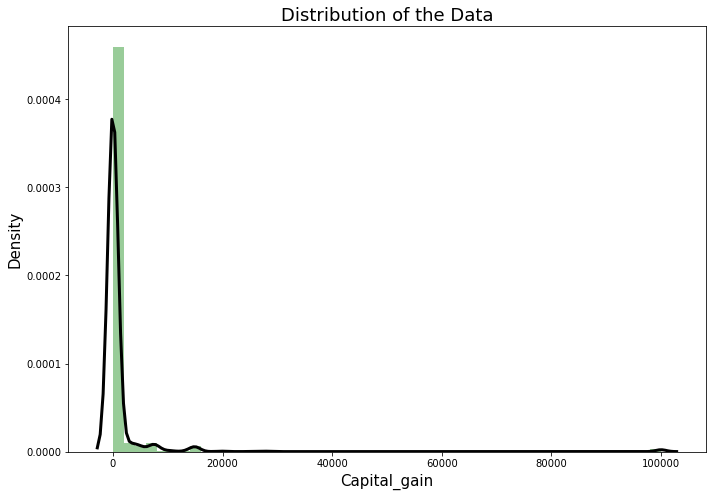

In [47]:
num_plot('Capital_gain')

- Capital-gain is highly right skewed.
- maximum data points fall in to 0 to 2000 range.

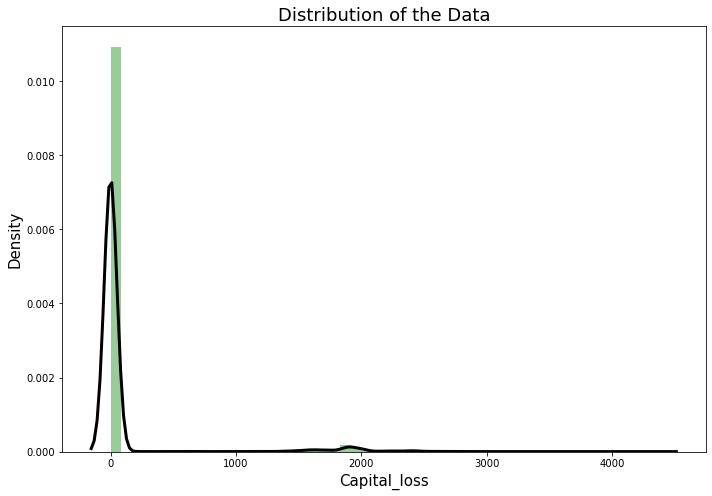

In [48]:
num_plot('Capital_loss')

- Capital loss is highly right skewed also.
- maximum data points falls near 0.

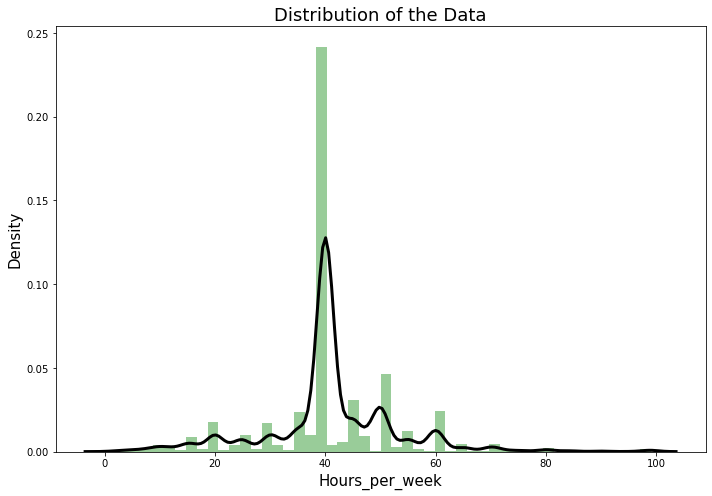

In [49]:
num_plot('Hours_per_week')

- Maximum hours are in the range of 40 and it is obvious that the globaly standard hour for a week is 40.
- Hoursper week also highly right and left skewed.

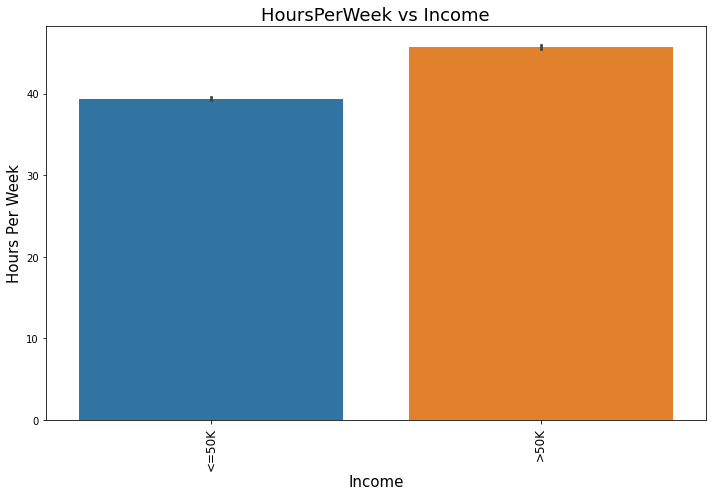

In [50]:
 plt.figure(figsize=(10,7))
sns.barplot(y=df['Hours_per_week'],x=df['Income'])
plt.ylabel('Hours Per Week',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.title('HoursPerWeek vs Income',fontsize=18)
plt.xticks(rotation=90,fontsize=12)
plt.tight_layout()

No big difference between less then 50k and more then 50k .

In [51]:
## printing dataframe
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Others,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Others,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Feature Engineering

- Seems Education and Education_num features are overlapping.
- Relationship and Marital_status are also overlappiing.
- We can cut and the Age feature in the bins.
- In Native_country visualization we have seen that United-States count is very high in that particular column so what we will do, we will make two category in that column  one is United-States and second one is Others.
- We also cut the Hours per week column in to bins.

### Education Vs Income

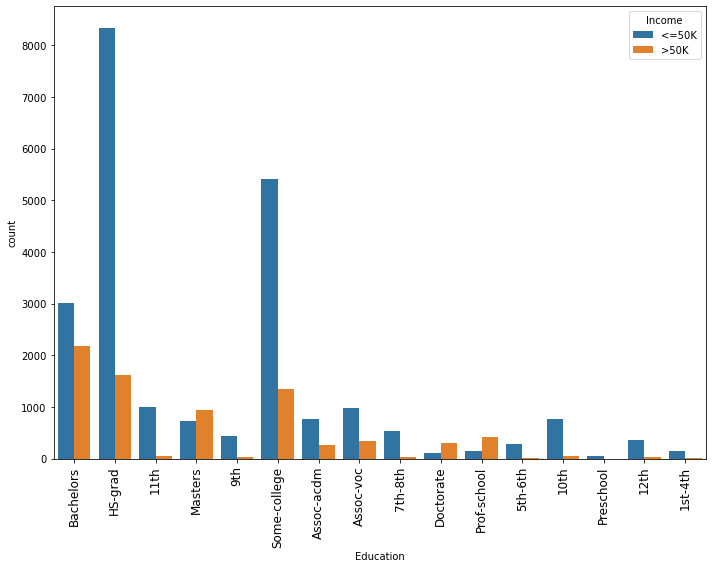

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(x='Education',data=df,hue='Income')
plt.xticks(rotation=90,fontsize=12)
plt.tight_layout()

- We see from above graph that as the education level increases ,the proportion  of the prople who earn more than 50k a year also increases. It is intresting to note that only after master's degree the count of the people earning more than 50k a year, is a majority.


### HoursPerWeek Vs Income

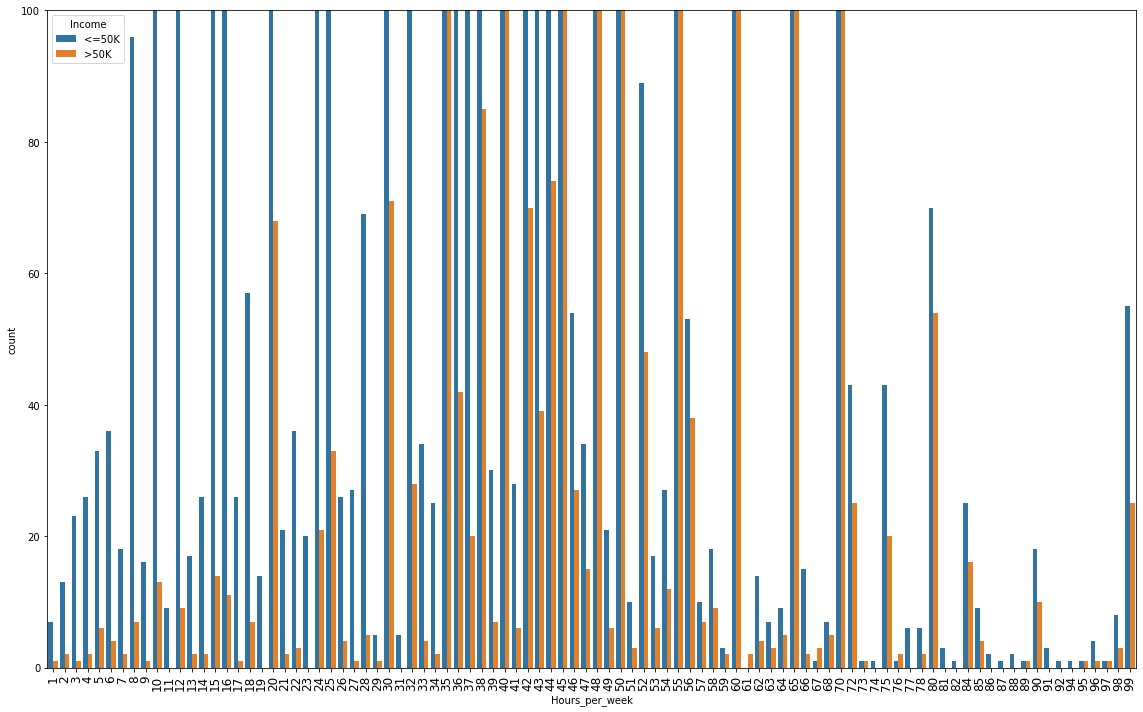

In [53]:
plt.figure(figsize=(16,10))
sns.countplot(x='Hours_per_week',data=df,hue='Income')
plt.xticks(rotation=90,fontsize=12)
plt.ylim(0,100)
plt.tight_layout()

- We would expected to notice a trend that higher the hours worked per week, the higher the proportion making more than 50k per year . However this  was not necessarily true from the graph.
- For several hours instance, where hours worked as 77, 82,87,92 etc. Where no one earning more than 50k.

In [54]:
### converting Hours per week into bins.

for i in df.Hours_per_week:
    if i<=40:
        df.Hours_per_week.replace(i,'<=40',inplace=True)
    elif i<=60:
        df.Hours_per_week.replace(i,'40-60',inplace=True)
    elif i>60:
        df.Hours_per_week.replace(i,'>60',inplace=True)
        

In [55]:
df.Hours_per_week.value_counts()

<=40     21324
40-60     8293
>60       1076
Name: Hours_per_week, dtype: int64

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

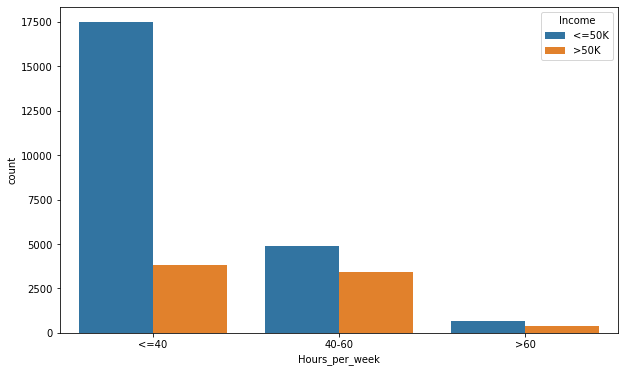

In [56]:
sns.countplot(df['Hours_per_week'],hue=df['Income'])

We have successfully converted the HoursPerWeek coulum into 3 categories. We can see it from above figure that there is a increasing trend showing.

#### Education vs Education_number

In [57]:
print(df.Education.unique())
print(df.Education_num.unique())

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  1  8  2]


In [58]:
for i in df.Education.unique():
    print(" For Education standard {} the Education level is {}".format(i,df[df.Education==i]['Education_num'].unique()) )

 For Education standard Bachelors the Education level is [13]
 For Education standard HS-grad the Education level is [9]
 For Education standard 11th the Education level is [7]
 For Education standard Masters the Education level is [14]
 For Education standard 9th the Education level is [5]
 For Education standard Some-college the Education level is [10]
 For Education standard Assoc-acdm the Education level is [12]
 For Education standard Assoc-voc the Education level is [11]
 For Education standard 7th-8th the Education level is [4]
 For Education standard Doctorate the Education level is [16]
 For Education standard Prof-school the Education level is [15]
 For Education standard 5th-6th the Education level is [3]
 For Education standard 10th the Education level is [6]
 For Education standard Preschool the Education level is [1]
 For Education standard 12th the Education level is [8]
 For Education standard 1st-4th the Education level is [2]


In [59]:
print(" For Education level , we have two features that give the same information , `Education` and `Education_num`.")
print("To ignore the negative effect of those attributes on the models to be inflated , I am going to drop categorical column of education")

df.drop('Education',axis=1,inplace=True)

print('Education column has been deleted successfully.')

 For Education level , we have two features that give the same information , `Education` and `Education_num`.
To ignore the negative effect of those attributes on the models to be inflated , I am going to drop categorical column of education
Education column has been deleted successfully.


### Marital_Status vs Relationship

In [60]:
print(df.Marital_status.unique())
print(df.Relationship.unique())

['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


In [61]:
for i in df.Marital_status.unique():
    print(" For Marital_status attribute {} the Relationship status is {}".format(i,df[df.Marital_status==i]['Relationship'].unique()) )

 For Marital_status attribute Married-civ-spouse the Relationship status is ['Husband' 'Wife' 'Own-child' 'Other-relative' 'Not-in-family']
 For Marital_status attribute Divorced the Relationship status is ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative']
 For Marital_status attribute Married-spouse-absent the Relationship status is ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative']
 For Marital_status attribute Never-married the Relationship status is ['Not-in-family' 'Own-child' 'Unmarried' 'Other-relative']
 For Marital_status attribute Separated the Relationship status is ['Unmarried' 'Own-child' 'Other-relative' 'Not-in-family']
 For Marital_status attribute Married-AF-spouse the Relationship status is ['Wife' 'Husband' 'Own-child' 'Other-relative']
 For Marital_status attribute Widowed the Relationship status is ['Unmarried' 'Not-in-family' 'Own-child' 'Other-relative']


We can see in the above output the relation between Marital-status and Relationship. 

we Can see that maritalstatus and relationship are overlapping.

We can replace the Marital_status attributes as given blow details:
- Married_civ_spouse = Married
- Married_spouse_absent=Married
- Separated= Married
- Married-AF-spouse= Married

- Divorced= Single
- Never-married=Single
- Widowed=Single

In [62]:
for i in df.Marital_status:
    if i =='Divorced':
        df.replace(i,'Single',inplace=True)
    elif i=='Married-AF-spouse':
        df.replace(i,'Married',inplace=True)
    elif i=='Married-civ-spouse':
        df.replace(i,'Married',inplace=True)
    elif i=='Married-spouse-absent':
        df.replace(i,'Married',inplace=True)
    elif i=='Never-married':
        df.replace(i,'Single',inplace=True)
    elif i=='Separated':
        df.replace(i,'Married',inplace=True)
    elif i=='Widowed':
        df.replace(i,'Single',inplace=True)
    


 value counts of Marital -Status 

Married    15702
Single     14991
Name: Marital_status, dtype: int64


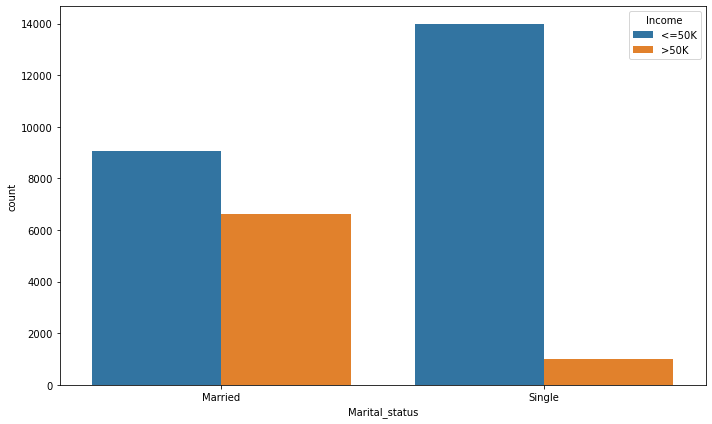

In [63]:
print("\n value counts of Marital -Status \n")
print(df.Marital_status.value_counts())
sns.countplot(df['Marital_status'],hue=df['Income'])
plt.tight_layout()

We have converted marital_status columns into two attributes. And we can say that married people have the majority of earning more then 50k.

We can see that Relationship and Marital_status are overlapping. So we are going to drop Relationship column as well.

In [64]:
df.drop('Relationship',axis=1,inplace=True)
print('Column deleted successfully')

Column deleted successfully


In [65]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married,Exec-managerial,White,Male,0,0,<=40,United-States,<=50K
1,38,Private,215646,9,Single,Handlers-cleaners,White,Male,0,0,<=40,United-States,<=50K
2,53,Private,234721,7,Married,Handlers-cleaners,Others,Male,0,0,<=40,United-States,<=50K
3,28,Private,338409,13,Married,Prof-specialty,Others,Female,0,0,<=40,Cuba,<=50K
4,37,Private,284582,14,Married,Exec-managerial,White,Female,0,0,<=40,United-States,<=50K


### Age:-

(17.0, 90.0)

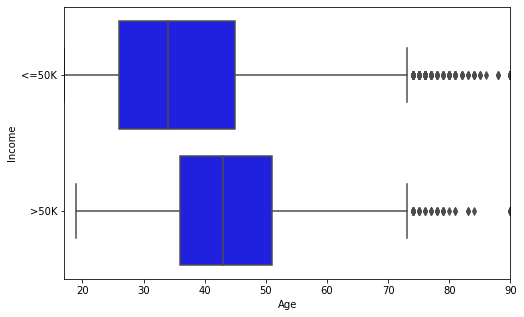

In [66]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Age'],y=df['Income'],color='blue')
plt.xlim(df['Age'].min(),df['Age'].max())

- We can see that 35 to 50 Aged people earning more then 50k in a year. 
- We can cut the age column into range.

In [67]:
for i in df.Age:
    if i <=25:
        df.Age.replace(i,'<25',inplace=True)
    elif i<=60:
        df.Age.replace(i,'<=60',inplace=True)
    
    else:
        df.Age.replace(i,'>60',inplace=True)

In [68]:
df.Age.value_counts()

<=60    23125
<25      5730
>60      1838
Name: Age, dtype: int64

## Native Country:

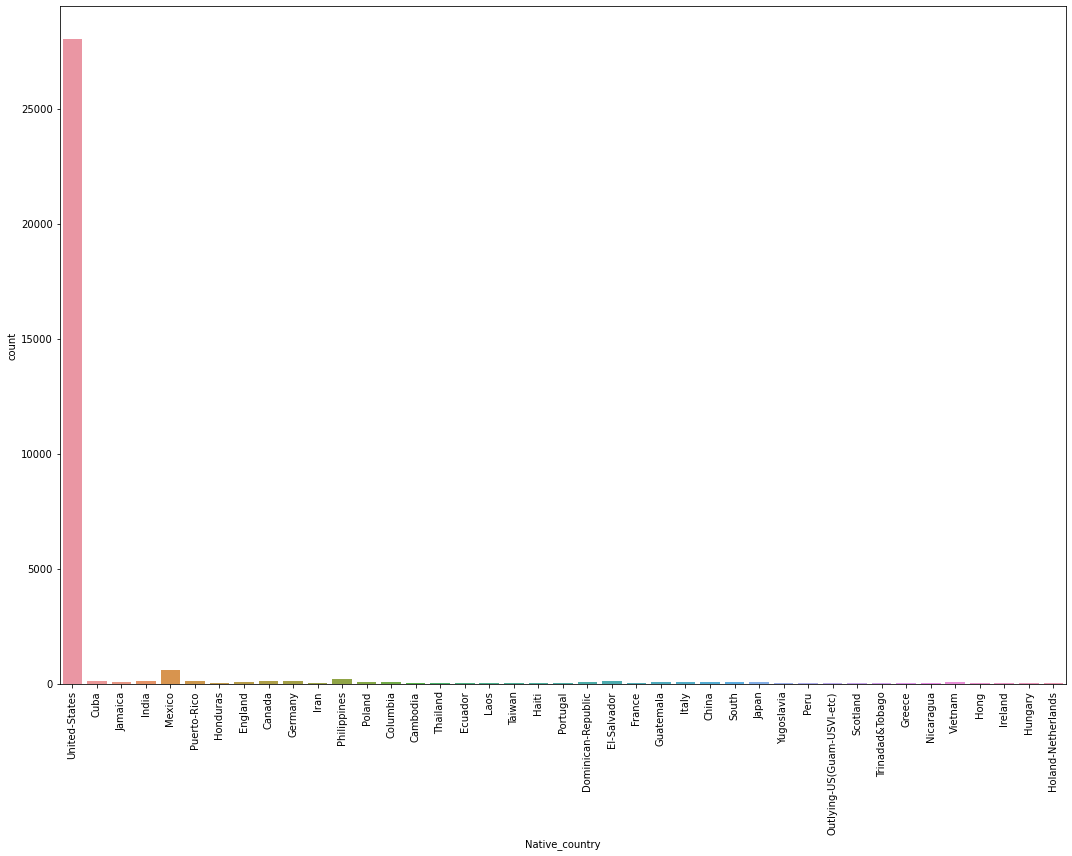

In [69]:
plt.figure(figsize=(15,12))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.tight_layout()

We can see that more then 95% of people belong to United-States. So We can make two category for this feature. 

- 1- United-States
- 2- Others(Rest of the countries)

In [70]:
for i in df.Native_country:
    if i != 'United-States':
        df.Native_country.replace(i,'Others',inplace=True)

In [71]:
df.Native_country.value_counts()

United-States    28041
Others            2652
Name: Native_country, dtype: int64

## Checking Outliers:

Fnlwgt is not related to our target variable income. This attributes does not convey individual related meaning. We already seen that in df.describe() function.

In [72]:
df.drop('Fnlwgt',axis=1,inplace=True)

In [73]:
df.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,<=60,Self-emp-not-inc,13,Married,Exec-managerial,White,Male,0,0,<=40,United-States,<=50K
1,<=60,Private,9,Single,Handlers-cleaners,White,Male,0,0,<=40,United-States,<=50K
2,<=60,Private,7,Married,Handlers-cleaners,Others,Male,0,0,<=40,United-States,<=50K
3,<=60,Private,13,Married,Prof-specialty,Others,Female,0,0,<=40,Others,<=50K
4,<=60,Private,14,Married,Exec-managerial,White,Female,0,0,<=40,United-States,<=50K


In [74]:
outlier_check=[ 'Education_num', 'Capital_gain', 'Capital_loss', ]
def outlier_checking(i):
    plt.figure(figsize=(10,7))
    sns.boxplot(x=df[i])
    #sns.xlabel(i,fontsize=10)
    plt.tight_layout()

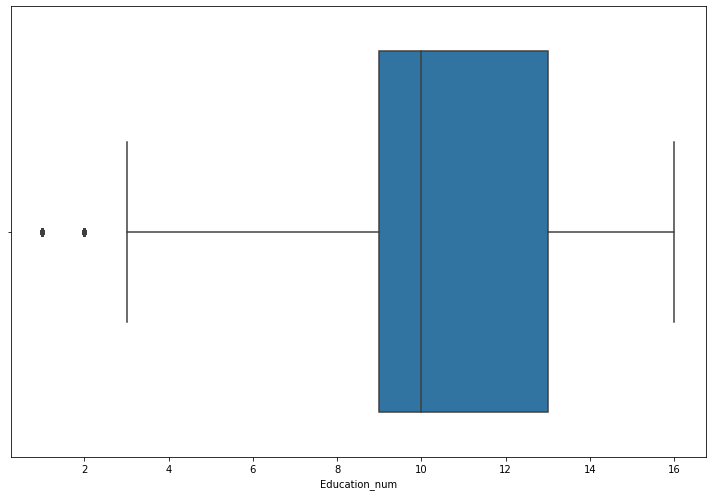

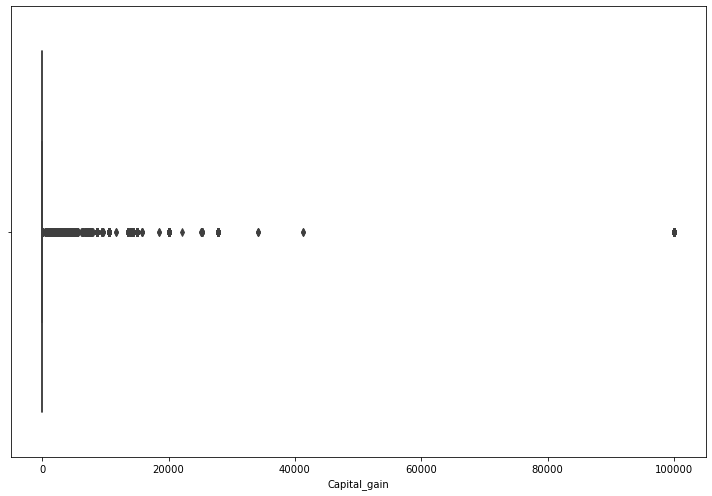

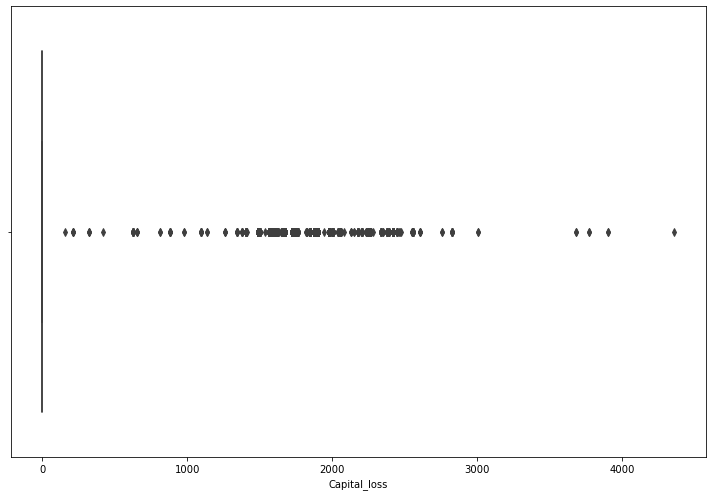

In [75]:
for j in outlier_check:
    outlier_checking(j)

As we can see that capital_gain and capital_loss has lot of outliers.

Let's handle them.

### Handling outliers using zscore()

In [76]:
### importing zscore
from scipy.stats import zscore
z_score=zscore(df[outlier_check])
abs_z_score=np.abs(z_score)

In [77]:
filtered_entry=(abs_z_score<3).all(axis=1)
df_new=df[filtered_entry]
print('Previous shape of the dataset : ',df.shape)
print('Current Shape of the dataset: ',df_new.shape)

Previous shape of the dataset :  (30693, 12)
Current Shape of the dataset:  (28880, 12)


## Data Loss

In [78]:
loss=(30717-28901)/30717*100
print("After removing the outlier the Data loss percentage is : ",loss)
print("\nIt is in acceptable range So we can proceed now.")

After removing the outlier the Data loss percentage is :  5.912035680567763

It is in acceptable range So we can proceed now.


## Checking Skewness:

In [79]:
df_new[outlier_check].skew()

Education_num    -0.165407
Capital_gain      4.855795
Capital_loss     29.661594
dtype: float64

 capital gain and capital loss in highly skewed. We will not check skewness for categorical data. 
 
 ### Handling skewness using Numpy

In [80]:
df_new.Capital_loss=np.cbrt(df_new['Capital_loss'].values.reshape(-1,1))
df_new.Capital_gain=np.cbrt(df_new['Capital_gain'].values.reshape(-1,1))

### Encoding
We will use two types of encoding technique
- Label Encoder for (Marital_status,Sex,Race,Income,Native_country)
- get_dummies for (Age,Workclass,Occupation,Hours_per_week)

In [81]:
feature1=['Marital_status','Sex','Race','Income','Native_country']
feature2=['Age','Workclass','Occupation','Hours_per_week']
### importing label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in feature1:
    df_new[i]=le.fit_transform(df_new[i].values.reshape(-1,1))

In [82]:
df_new

,Age,Workclass,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,<=60,Self-emp-not-inc,13,0,Exec-managerial,1,1,0.000000,0.0,<=40,1,0
1,<=60,Private,9,1,Handlers-cleaners,1,1,0.000000,0.0,<=40,1,0
2,<=60,Private,7,0,Handlers-cleaners,0,1,0.000000,0.0,<=40,1,0
3,<=60,Private,13,0,Prof-specialty,0,0,0.000000,0.0,<=40,0,0
4,<=60,Private,14,0,Exec-managerial,1,0,0.000000,0.0,<=40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,<=60,Private,12,0,Tech-support,1,0,0.000000,0.0,<=40,1,0
32556,<=60,Private,9,0,Machine-op-inspct,1,1,0.000000,0.0,<=40,1,1
32557,<=60,Private,9,1,Adm-clerical,1,0,0.000000,0.0,<=40,1,0
32558,<25,Private,9,1,Adm-clerical,1,1,0.000000,0.0,<=40,1,0


In [83]:
df1=pd.get_dummies(df_new[feature2],drop_first=False)
df1

,Age_<25,Age_<=60,Age_>60,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Hours_per_week_40-60,Hours_per_week_<=40,Hours_per_week_>60
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32556,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
32557,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32558,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### joining the dataframe:


In [84]:
df_new=df_new.join(df1)
df_new.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Age_<25,Age_<=60,Age_>60,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Hours_per_week_40-60,Hours_per_week_<=40,Hours_per_week_>60
0,<=60,Self-emp-not-inc,13,0,Exec-managerial,1,1,0.0,0.0,<=40,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,<=60,Private,9,1,Handlers-cleaners,1,1,0.0,0.0,<=40,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,<=60,Private,7,0,Handlers-cleaners,0,1,0.0,0.0,<=40,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,<=60,Private,13,0,Prof-specialty,0,0,0.0,0.0,<=40,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,<=60,Private,14,0,Exec-managerial,1,0,0.0,0.0,<=40,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [85]:
### dropping unwanted columns:
df_new.drop(columns=feature2,inplace=True)
df_new.head()

,Education_num,Marital_status,Race,Sex,Capital_gain,Capital_loss,Native_country,Income,Age_<25,Age_<=60,Age_>60,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Hours_per_week_40-60,Hours_per_week_<=40,Hours_per_week_>60
0,13,0,1,1,0.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,9,1,1,1,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,7,0,0,1,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,13,0,0,0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,14,0,1,0,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


## Splitting and Scaling the dataset.

In [86]:
x=df_new.drop('Income',axis=1)
y=df_new['Income']

In [87]:
x

,Education_num,Marital_status,Race,Sex,Capital_gain,Capital_loss,Native_country,Age_<25,Age_<=60,Age_>60,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Hours_per_week_40-60,Hours_per_week_<=40,Hours_per_week_>60
0,13,0,1,1,0.000000,0.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,9,1,1,1,0.000000,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,7,0,0,1,0.000000,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,13,0,0,0,0.000000,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,14,0,1,0,0.000000,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,12,0,1,0,0.000000,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32556,9,0,1,1,0.000000,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
32557,9,1,1,0,0.000000,0.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32558,9,1,1,1,0.000000,0.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [88]:
### scalling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [89]:
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))

In [101]:
x.columns

Index(['Education_num', 'Marital_status', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Native_country', 'Age_<25', 'Age_<=60', 'Age_>60',
       'Workclass_Federal-gov', 'Workclass_Local-gov', 'Workclass_Private',
       'Workclass_Self-emp-inc', 'Workclass_Self-emp-not-inc',
       'Workclass_State-gov', 'Workclass_Without-pay',
       'Occupation_Adm-clerical', 'Occupation_Armed-Forces',
       'Occupation_Craft-repair', 'Occupation_Exec-managerial',
       'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners',
       'Occupation_Machine-op-inspct', 'Occupation_Other-service',
       'Occupation_Priv-house-serv', 'Occupation_Prof-specialty',
       'Occupation_Protective-serv', 'Occupation_Sales',
       'Occupation_Tech-support', 'Occupation_Transport-moving',
       'Hours_per_week_40-60', 'Hours_per_week_<=40', 'Hours_per_week_>60'],
      dtype='object')

## Summary:
- Handle Nulls :- Done
- EDA(Relation with features) :- Done
- Handle Outliers :- Done
- Handle skewness :- Done
- Dropping Unwanted features :- Done
- Checking Multicollinearity using Heatmap:- Done
- Feature Engeneering  :- Done
- Imbalance Handling :- Will be done in model building 

We have checked all the necessary things, Let's proceed for model building>

## Model Building:-

Handling Imbalanced dataset SMOTE

In [91]:
## importing smote

from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [92]:
### importing train test 
from sklearn.model_selection import train_test_split


In [93]:
### importing the models
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
rf=RandomForestClassifier()
adc=AdaBoostClassifier()
gbdt=GradientBoostingClassifier()
from sklearn.svm import SVC
svc=SVC()


In [94]:
#### importing metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

### importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

### Finding the Best Random State

In [101]:
def Best_random_state(model,feature,target):
    minimum=0
    for i in range(1,101):
        x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.25,random_state=i)
        over_sampling=SMOTE(0.70)
        x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
        model.fit(x_train_new,y_train_new)
        train=model.predict(x_train)
        test=model.predict(x_test)
        roc_score=roc_auc_score(y_test,test)
        if roc_score>minimum:
            
            minimum=roc_score
            j=i
    return j
        
    


### Defining a function for printing scores:

In [102]:
def print_score(Model,independent,dependent,train=True):
    best_randomState=Best_random_state(Model,independent,dependent)
    print("The best Random State for {Model} is : ,",best_randomState)
    print("\n")
    x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.25,random_state=best_randomState)
    over_sampling=SMOTE(0.70)
    x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
    Model.fit(x_train_new,y_train_new)
    if train:
        prediction=Model.predict(x_train_new)
        print('After Oversampling the  new shape of Xtrain is : ',x_train_new.shape)
        print("After oversampling the new shape of Ytrain is : ",y_train_new.shape)
        print("\n********************Traning Scores****************************\n")
        print("Accuracy Score is {} for Training Model.".format(accuracy_score(y_train_new,prediction)))
        print("\n F1 Score for the model is : \n", f1_score(y_train_new,prediction))
        print("\n*******************Confusion Matrix***************************\n")
        print(confusion_matrix(y_train_new,prediction))
        print("\n\n Training Classification Report \n",classification_report(y_train_new,prediction))
    
    if train==False:
        pred=Model.predict(x_test)
        print("\n\n")
        print("***********************Testing Scores******************************\n")
        print("Accuracy score for testing is : ", accuracy_score(y_test,pred))
        print("\n F1 Score for testing is : ", f1_score(y_test,pred))
        print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
        print("\n The Classification report for Testing \n", classification_report(y_test,pred))
        
        

### Defining a function for Cross Validation

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
def Cross_validation(clf,X,Y):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=Best_random_state(clf,X,Y))
    over_sampling=SMOTE(0.70)
    x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
    clf.fit(x_train_new,y_train_new)
    pred_y=clf.predict(x_test)
    for i in range(2,11):
        score=cross_val_score(clf,X,Y,cv=i)
        mean=score.mean()
        print("\nAt Random State {}, the cross validation score of the model is {}. And accuracy Score is {} ".format(i,mean,accuracy_score(y_test,pred_y)))
        print("\n The difference between corss val score and Accuaracy score is : ", mean-accuracy_score(y_test,pred_y))             

## 1. LogisticRegression:-

In [97]:
print(print_score(lr,x,y,train=True))
print(print_score(lr,x,y,train=False))

The best Random State for {Model} is : , 28


After Oversampling the  new shape of Xtrain is :  (28306, 34)
After oversampling the new shape of Ytrain is :  (28306,)

********************Traning Scores****************************

Accuracy Score is 0.7957676817635837 for Training Model.

 F1 Score for the model is : 
 0.7501836567131931

*******************Confusion Matrix***************************

[[13845  2806]
 [ 2975  8680]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.83      0.83     16651
           1       0.76      0.74      0.75     11655

    accuracy                           0.80     28306
   macro avg       0.79      0.79      0.79     28306
weighted avg       0.80      0.80      0.80     28306

None
The best Random State for {Model} is : , 28





***********************Testing Scores******************************

Accuracy score for testing is :  0.8203708829227788

 F1 Score for testing is :

### Cross Validation for Logistic Regression:

In [98]:
Cross_validation(lr,x,y)


At Random State 2, the cross validation score of the model is 0.839278980944794. And accuracy Score is 0.8200941046221977 

 The difference between corss val score and Accuaracy score is :  0.019184876322596356

At Random State 3, the cross validation score of the model is 0.8388291370021898. And accuracy Score is 0.8200941046221977 

 The difference between corss val score and Accuaracy score is :  0.018735032379992078

At Random State 4, the cross validation score of the model is 0.8388291751144703. And accuracy Score is 0.8200941046221977 

 The difference between corss val score and Accuaracy score is :  0.018735070492272632

At Random State 5, the cross validation score of the model is 0.838760041395599. And accuracy Score is 0.8200941046221977 

 The difference between corss val score and Accuaracy score is :  0.018665936773401337

At Random State 6, the cross validation score of the model is 0.8386908023585719. And accuracy Score is 0.8200941046221977 

 The difference between 

- best random state = 28
- Best CV score is = 9


## 2. Decision Tree

In [105]:
print(print_score(dt,x,y,train=True))
print(print_score(dt,x,y,train=False))

The best Random State for {Model} is : , 39


After Oversampling the  new shape of Xtrain is :  (28332, 34)
After oversampling the new shape of Ytrain is :  (28332,)

********************Traning Scores****************************

Accuracy Score is 0.8861358181561485 for Training Model.

 F1 Score for the model is : 
 0.8646016956266263

*******************Confusion Matrix***************************

[[14806  1860]
 [ 1366 10300]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90     16666
           1       0.85      0.88      0.86     11666

    accuracy                           0.89     28332
   macro avg       0.88      0.89      0.88     28332
weighted avg       0.89      0.89      0.89     28332

None
The best Random State for {Model} is : , 89





***********************Testing Scores******************************

Accuracy score for testing is :  0.8228531855955679

 F1 Score for testing is :

### Cross Validation for Decision Tree model.

In [107]:
Cross_validation(dt,x,y)


At Random State 2, the cross validation score of the model is 0.8285664819944598. And accuracy Score is 0.8217451523545707 

 The difference between corss val score and Accuaracy score is :  0.006821329639889129

At Random State 3, the cross validation score of the model is 0.8336219252226765. And accuracy Score is 0.8217451523545707 

 The difference between corss val score and Accuaracy score is :  0.011876772868105845

At Random State 4, the cross validation score of the model is 0.8336911357340719. And accuracy Score is 0.8217451523545707 

 The difference between corss val score and Accuaracy score is :  0.011945983379501257

At Random State 5, the cross validation score of the model is 0.8343836565096954. And accuracy Score is 0.8217451523545707 

 The difference between corss val score and Accuaracy score is :  0.012638504155124686

At Random State 6, the cross validation score of the model is 0.8362535305683929. And accuracy Score is 0.8217451523545707 

 The difference betwee

- Best random state for decision tree :- 39
- Best CV is :-  10 selected

## 3. Random Forest Classifier:-

In [108]:
print(print_score(rf,x,y,train=True))
print(print_score(rf,x,y,train=False))

The best Random State for {Model} is : , 39


After Oversampling the  new shape of Xtrain is :  (28332, 34)
After oversampling the new shape of Ytrain is :  (28332,)

********************Traning Scores****************************

Accuracy Score is 0.886559367499647 for Training Model.

 F1 Score for the model is : 
 0.867190082644628

*******************Confusion Matrix***************************

[[14625  2041]
 [ 1173 10493]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     16666
           1       0.84      0.90      0.87     11666

    accuracy                           0.89     28332
   macro avg       0.88      0.89      0.88     28332
weighted avg       0.89      0.89      0.89     28332

None
The best Random State for {Model} is : , 39





***********************Testing Scores******************************

Accuracy score for testing is :  0.8182825484764543

 F1 Score for testing is :  

## Cross Validation for Random Forest

In [109]:
Cross_validation(rf,x,y)


At Random State 2, the cross validation score of the model is 0.8335526315789474. And accuracy Score is 0.8098337950138504 

 The difference between corss val score and Accuaracy score is :  0.02371883656509699

At Random State 3, the cross validation score of the model is 0.8372230272695326. And accuracy Score is 0.8098337950138504 

 The difference between corss val score and Accuaracy score is :  0.027389232255682128

At Random State 4, the cross validation score of the model is 0.8365997229916898. And accuracy Score is 0.8098337950138504 

 The difference between corss val score and Accuaracy score is :  0.026765927977839388

At Random State 5, the cross validation score of the model is 0.8382617728531857. And accuracy Score is 0.8098337950138504 

 The difference between corss val score and Accuaracy score is :  0.02842797783933526

At Random State 6, the cross validation score of the model is 0.8388504475355013. And accuracy Score is 0.8098337950138504 

 The difference between 

- Best Random state for random Forest :- 39
- Best cv=7 selected.

## Ada Boost 

In [110]:
print(print_score(adc,x,y,train=True))
print(print_score(adc,x,y,train=False))

The best Random State for {Model} is : , 12


After Oversampling the  new shape of Xtrain is :  (28208, 34)
After oversampling the new shape of Ytrain is :  (28208,)

********************Traning Scores****************************

Accuracy Score is 0.8131735677821894 for Training Model.

 F1 Score for the model is : 
 0.7708695652173914

*******************Confusion Matrix***************************

[[14073  2520]
 [ 2750  8865]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     16593
           1       0.78      0.76      0.77     11615

    accuracy                           0.81     28208
   macro avg       0.81      0.81      0.81     28208
weighted avg       0.81      0.81      0.81     28208

None
The best Random State for {Model} is : , 12





***********************Testing Scores******************************

Accuracy score for testing is :  0.8371191135734072

 F1 Score for testing is :

## Cross validation for Ada boost

In [111]:
Cross_validation(adc,x,y)


At Random State 2, the cross validation score of the model is 0.85. And accuracy Score is 0.8301939058171746 

 The difference between corss val score and Accuaracy score is :  0.019806094182825418

At Random State 3, the cross validation score of the model is 0.8496192487002538. And accuracy Score is 0.8301939058171746 

 The difference between corss val score and Accuaracy score is :  0.01942534288307929

At Random State 4, the cross validation score of the model is 0.8498614958448754. And accuracy Score is 0.8301939058171746 

 The difference between corss val score and Accuaracy score is :  0.0196675900277008

At Random State 5, the cross validation score of the model is 0.8493421052631579. And accuracy Score is 0.8301939058171746 

 The difference between corss val score and Accuaracy score is :  0.019148199445983338

At Random State 6, the cross validation score of the model is 0.8489267975561156. And accuracy Score is 0.8301939058171746 

 The difference between corss val score

- Best Random State for Ada boost: - 12
- cv=2 selected.

## Gradient Boosting Classifier

In [112]:
print(print_score(gbdt,x,y,train=True))
print(print_score(gbdt,x,y,train=False))

The best Random State for {Model} is : , 96


After Oversampling the  new shape of Xtrain is :  (28316, 34)
After oversampling the new shape of Ytrain is :  (28316,)

********************Traning Scores****************************

Accuracy Score is 0.8276239581861845 for Training Model.

 F1 Score for the model is : 
 0.7910977958484913

*******************Confusion Matrix***************************

[[14193  2464]
 [ 2417  9242]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     16657
           1       0.79      0.79      0.79     11659

    accuracy                           0.83     28316
   macro avg       0.82      0.82      0.82     28316
weighted avg       0.83      0.83      0.83     28316

None
The best Random State for {Model} is : , 96





***********************Testing Scores******************************

Accuracy score for testing is :  0.8349030470914127

 F1 Score for testing is :

## Cross Validation for GBDT

In [113]:
Cross_validation(gbdt,x,y)


At Random State 2, the cross validation score of the model is 0.8506925207756233. And accuracy Score is 0.8283933518005541 

 The difference between corss val score and Accuaracy score is :  0.022299168975069228

At Random State 3, the cross validation score of the model is 0.8514544011829623. And accuracy Score is 0.8283933518005541 

 The difference between corss val score and Accuaracy score is :  0.023061049382408272

At Random State 4, the cross validation score of the model is 0.8518351800554017. And accuracy Score is 0.8283933518005541 

 The difference between corss val score and Accuaracy score is :  0.02344182825484764

At Random State 5, the cross validation score of the model is 0.8520429362880886. And accuracy Score is 0.8283933518005541 

 The difference between corss val score and Accuaracy score is :  0.023649584487534514

At Random State 6, the cross validation score of the model is 0.851523764876165. And accuracy Score is 0.8283933518005541 

 The difference between 

- Best random state for GBDT = 96
- CV= 5 selected

## SVC

In [104]:
 for i in range(12,41):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
        over_sampling=SMOTE(0.70)
        x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
        svc.fit(x_train_new,y_train_new)
        svc.predict(x_train)
        test_y=svc.predict(x_test)
        score=accuracy_score(y_test,test_y)
        print("The Random state {} the accuracy score is {} ".format(i,score))

The Random state 12 the accuracy score is 0.8209141274238227 
The Random state 13 the accuracy score is 0.800415512465374 
The Random state 14 the accuracy score is 0.8099722991689751 
The Random state 15 the accuracy score is 0.7991689750692521 
The Random state 16 the accuracy score is 0.8062326869806095 
The Random state 17 the accuracy score is 0.8047091412742382 
The Random state 18 the accuracy score is 0.8030470914127423 
The Random state 19 the accuracy score is 0.8126038781163435 
The Random state 20 the accuracy score is 0.8006925207756233 
The Random state 21 the accuracy score is 0.8060941828254847 
The Random state 22 the accuracy score is 0.8159279778393351 
The Random state 23 the accuracy score is 0.810803324099723 
The Random state 24 the accuracy score is 0.8069252077562327 
The Random state 25 the accuracy score is 0.796398891966759 
The Random state 26 the accuracy score is 0.8088642659279779 
The Random state 27 the accuracy score is 0.8051246537396122 
The Random 

## cross validation for SVC

In [106]:
from sklearn.model_selection import cross_val_score
for i in range(2,11):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)
    over_sampling=SMOTE(0.70)
    x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
    svc.fit(x_train_new,y_train_new)
    pred_y=svc.predict(x_test)
    score=cross_val_score(svc,x,y,cv=i)
    mean=score.mean()
    print("\nAt Random State {}, the cross validation score of the model is {}. And accuracy Score is {} ".format(i,mean,accuracy_score(y_test,pred_y)))
    print("\n The difference between corss val score and Accuaracy score is : ", mean-accuracy_score(y_test,pred_y))             


At Random State 2, the cross validation score of the model is 0.8377423822714682. And accuracy Score is 0.8228531855955679 

 The difference between corss val score and Accuaracy score is :  0.014889196675900385

At Random State 3, the cross validation score of the model is 0.8388158058732204. And accuracy Score is 0.8225761772853185 

 The difference between corss val score and Accuaracy score is :  0.016239628587901844

At Random State 4, the cross validation score of the model is 0.8386426592797784. And accuracy Score is 0.8213296398891967 

 The difference between corss val score and Accuaracy score is :  0.01731301939058172

At Random State 5, the cross validation score of the model is 0.8394736842105264. And accuracy Score is 0.8218836565096953 

 The difference between corss val score and Accuaracy score is :  0.017590027700831068

At Random State 6, the cross validation score of the model is 0.8395431601384943. And accuracy Score is 0.8221606648199447 

 The difference between

In [107]:
### F1 Scroe
from sklearn.metrics import f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)
over_sampling=SMOTE(0.70)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
svc.fit(x_train_new,y_train_new)
test_y=svc.predict(x_test)
f1score=f1_score(y_test,test_y)

print("\n The F1 Score for SVC Model is : ", f1score)


 The F1 Score for SVC Model is :  0.657844990548204


- At Random State 12 SVC model give the best performance so RandomState 12 Selected.

- At cv= 5 Cross Validation score is 83.94% Which is the best score among them . So Cv= 5 selected.

## KNeighbors Classifier:-

In [108]:
 for i in range(1,41):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
        over_sampling=SMOTE(0.70)
        x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
        knn.fit(x_train_new,y_train_new)
        svc.predict(x_train)
        test_y=knn.predict(x_test)
        score=accuracy_score(y_test,test_y)
        print("The Random state {} the accuracy score is {} ".format(i,score))

The Random state 1 the accuracy score is 0.7915512465373962 
The Random state 2 the accuracy score is 0.803601108033241 
The Random state 3 the accuracy score is 0.7908587257617729 
The Random state 4 the accuracy score is 0.7894736842105263 
The Random state 5 the accuracy score is 0.7907202216066482 
The Random state 6 the accuracy score is 0.7943213296398892 
The Random state 7 the accuracy score is 0.7903047091412743 
The Random state 8 the accuracy score is 0.7914127423822714 
The Random state 9 the accuracy score is 0.7833795013850415 
The Random state 10 the accuracy score is 0.8083102493074792 
The Random state 11 the accuracy score is 0.789196675900277 
The Random state 12 the accuracy score is 0.7861495844875346 
The Random state 13 the accuracy score is 0.8066481994459834 
The Random state 14 the accuracy score is 0.8062326869806095 
The Random state 15 the accuracy score is 0.7990304709141274 
The Random state 16 the accuracy score is 0.7858725761772853 
The Random state 17

In [111]:
### F1 Scroe...
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)
over_sampling=SMOTE(0.70)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
knn.fit(x_train_new,y_train_new)
test_y=knn.predict(x_test)
f1score=f1_score(y_test,test_y)

print("\n The F1 Score for KNN Model is : ", f1score)


 The F1 Score for KNN Model is :  0.6012335746849021


## Cross Validation for KNN:-

In [109]:
for i in range(2,11):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)
    over_sampling=SMOTE(0.70)
    x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
    knn.fit(x_train_new,y_train_new)
    pred_y=knn.predict(x_test)
    score=cross_val_score(knn,x,y,cv=i)
    mean=score.mean()
    print("\nAt Random State {}, the cross validation score of the model is {}. And accuracy Score is {} ".format(i,mean,accuracy_score(y_test,pred_y)))
    print("\n The difference between corss val score and Accuaracy score is : ", mean-accuracy_score(y_test,pred_y))             



At Random State 2, the cross validation score of the model is 0.8153393351800554. And accuracy Score is 0.7973684210526316 

 The difference between corss val score and Accuaracy score is :  0.017970914127423798

At Random State 3, the cross validation score of the model is 0.8178672202209526. And accuracy Score is 0.7979224376731302 

 The difference between corss val score and Accuaracy score is :  0.019944782547822393

At Random State 4, the cross validation score of the model is 0.8186980609418283. And accuracy Score is 0.8066481994459834 

 The difference between corss val score and Accuaracy score is :  0.01204986149584486

At Random State 5, the cross validation score of the model is 0.8195983379501385. And accuracy Score is 0.8033240997229917 

 The difference between corss val score and Accuaracy score is :  0.016274238227146798

At Random State 6, the cross validation score of the model is 0.8200138007340768. And accuracy Score is 0.7948753462603878 

 The difference between

### `As we can that almost all the models give us the same  accuracy scores and  Cross validation scores. It is difficult to select the Best fit model here. `

### So that  we will take `F1 Score` as the base for finding the Best Fit Model for our  problem statement.
## Conclusion:
### As we can see that `Logistic Regression` gives us the Best `F1 Score`.
###### For Logistic Regression:-
- `Accuracy Score is :-  82.05%`
- `F1 Score is :-  66.7%`
- `Best RandomState is :- 28`
- `Best K fold is :- 9`
- `AT Cv= 9, the  Cross validation score is :- 83.9%`

Let's Tune the parameter for Logistic Regression.

## HyperParameter Tunning:-


In [119]:
## Printing the Logistic Regression scores:-
lr=LogisticRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=28)
over_sampling=SMOTE(0.70)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
lr.fit(x_train_new,y_train_new)
y_pred=lr.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,y_pred))
print("\n F1 Score for testing is : ", f1_score(y_test,y_pred))
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",matrix)
true_positive=matrix[0][0]
false_positive=matrix[0][1]
false_negative=matrix[1][0]
true_negative=matrix[1][1]
print("True positives are :- " ,true_positive)
print("False positives are :- " ,false_positive)
print("False negatives are :- " ,false_negative)
print("True negatives are :- " ,true_negative)
print("\n The Classification report for Testing \n", classification_report(y_test,y_pred))
        




***********************Testing Scores******************************

Accuracy score for testing is :  0.8102493074792244

 F1 Score for testing is :  0.6456285566476978
Confusion Matrix : 
 [[4602  933]
 [ 437 1248]]
True positives are :-  4602
False positives are :-  933
False negatives are :-  437
True negatives are :-  1248

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      5535
           1       0.57      0.74      0.65      1685

    accuracy                           0.81      7220
   macro avg       0.74      0.79      0.76      7220
weighted avg       0.83      0.81      0.82      7220



In [122]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
'C':[0.001,0.01,0.1,0.2,0.3],
'n_jobs' : [-1],
'multi_class' : ['auto', 'ovr', 'multinomial'],
'max_iter':[50,100,200,500]}

In [123]:
grid_search=GridSearchCV(lr,params,cv=9)

In [124]:
grid_search.fit(x_train_new,y_train_new)

GridSearchCV(cv=9, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_iter': [50, 100, 200, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [125]:
print(grid_search.best_params_)

{'C': 0.001, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': -1, 'penalty': 'none'}


In [127]:
### reassigning the attributes of the model:-
Lr=LogisticRegression(C=0.001,max_iter=100,multi_class='multinomial',n_jobs=-1,penalty='none')

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=28)
over_sampling=SMOTE(0.70)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
Lr.fit(x_train_new,y_train_new)
prediction=Lr.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,prediction))
print("\n F1 Score for testing is : ", f1_score(y_test,prediction))
matrix=confusion_matrix(y_test,prediction)
print("Confusion Matrix : \n",matrix)
true_positive=matrix[0][0]
false_positive=matrix[0][1]
false_negative=matrix[1][0]
true_negative=matrix[1][1]
print("True positives are :- " ,true_positive)
print("False positives are :- " ,false_positive)
print("False negatives are :- " ,false_negative)
print("True negatives are :- " ,true_negative)
print("\n The Classification report for Testing \n", classification_report(y_test,prediction))
        




***********************Testing Scores******************************

Accuracy score for testing is :  0.8065096952908587

 F1 Score for testing is :  0.6433495021700281
Confusion Matrix : 
 [[4563  972]
 [ 425 1260]]
True positives are :-  4563
False positives are :-  972
False negatives are :-  425
True negatives are :-  1260

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.91      0.82      0.87      5535
           1       0.56      0.75      0.64      1685

    accuracy                           0.81      7220
   macro avg       0.74      0.79      0.76      7220
weighted avg       0.83      0.81      0.81      7220



In [128]:
### Cross Validation Score is:-
score=cross_val_score(Lr,x,y,cv=9)
score_mean=score.mean()
print("\n The cross validation score is : ",score_mean)
print("\n For Cv=9, the  scores are : \n",score)


 The cross validation score is :  0.8388849320727129

 For Cv=9, the  scores are : 
 [0.83390464 0.83795575 0.84044874 0.83265815 0.84418822 0.84169523
 0.83795575 0.84543471 0.83572319]


## Roc AUC Curve

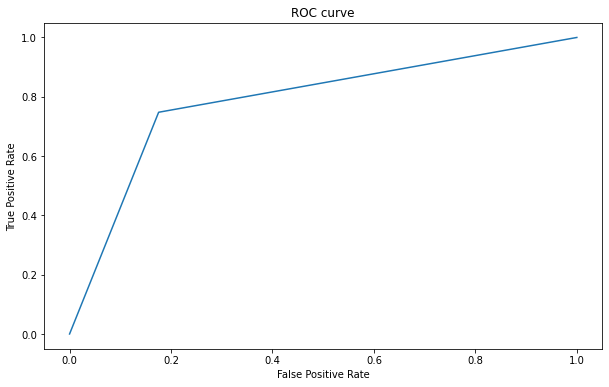

AUC value is 0.7860823623073027 


In [129]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,prediction)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## Saving The  model:-

In [130]:
import joblib
joblib.dump(Lr,'Census_Income_Prediction')

['Census_Income_Prediction']

## Comparing the  Model's Prediction with Acutal

In [131]:
original=np.array(y_test)
predicted=np.array(Lr.predict(x_test))
new_df=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
new_df

,Actual,Predicted
0,1,0
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
7215,0,0
7216,0,0
7217,1,1
7218,1,1
